# AML Lab Sessional 1 Jupyter Notebook

### 1. VS Code is a MUST
1. You should code in VS Code. Google Colab not allowed

### 2. Pre-requisites for lab in VS Code
1. Install PDF export support https://saturncloud.io/blog/how-to-export-jupyter-notebook-by-vscode-in-pdf-format/

### 3. At the end, export your notebook as html and ipynb
1. Open VS Code command palette Shift + Ctrl + P
2. Type "Export Jupyter Notebook" in the search bar and select "Export Jupyter Notebook to html"
3. Upload your html AND ipynb here: https://tinyurl.com/y9ptbej2 (In the prompt, put your name correctly else your submission will be rejected)

### 4. Lab Sessional Summary
1. A code template is given to you in lab sesional in this jupyter notebook
2. The template will follow a linear sequence of TODOs appropriately labelled with question marks
3. You will have to fill the TODO question marks to compile those notebook cells and proceed to next cells
4. You can think of the linear sequence of TODOs as a guided thought process.
5. Sessional is open book. Google, github, browse product documentation ChatGPT - Do anything you want, except copying others. No discussing among yourselves (Sending questions to your seniors and seeking answers is prohibited). If you are caught carrying out these illegal activities, you will be reported for immediate action.
6. You CANNOT replace the TODO code template with some other code copied from stack overflow, ChatGPT etc. All your browsing and search should give you insights into finally how you can fit that into the framework I provide for the thought process of solving the problem. You will have to mandatorily fill the question marks and proceed with the lab problem.

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
sk.__version__

'1.2.2'

### Problem Definition

You are provided with diabetes dataset. Your task is:

1. Part 1: To perform EDA and prediction without pipeline
2. Part 2: To move EDA and kNN prediction into a pipeline
3. Part 3: To combine the pipeline and gridsearch to get best K and weights hyperparameters
4. Part 4: Save the model as json file, load & use it to do prediction. This part is optional and will be used to accumulate bonus points as a buffer for the semester lab exam if there is any shortfall

# Part 1 - Perform EDA and prediction without pipeline

In [ ]:
# TODO: 1 Load the csv file
df = pd.read_csv('d2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
# TODO: 2 Display information about dataframe
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
# TODO: 3 Check if there are nulls and display their total for each feature
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# TODO: 4 Check for duplicates
dupsSeries = df.duplicated() # Should return a pandas Series with True False for every row

# Print the number of duplicates
print(f"Number of duplicates = {dupsSeries.sum()}")

Number of duplicates = 1256


In [ ]:
# TODO: 5 Drop duplicates inplace
df.drop_duplicates(inplace=True)

In [ ]:
# TODO: 6 Display how many rows exist in dataframe after dropping duplicates
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               744 non-null    int64  
 1   Glucose                   744 non-null    int64  
 2   BloodPressure             744 non-null    int64  
 3   SkinThickness             744 non-null    int64  
 4   Insulin                   744 non-null    int64  
 5   BMI                       744 non-null    float64
 6   DiabetesPedigreeFunction  744 non-null    float64
 7   Age                       744 non-null    int64  
 8   Outcome                   744 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.1 KB


In [ ]:
# TODO: 7 Identify candidate features for encoding by seeing how many distinct values are present in every column
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
Age                          52
Outcome                       2
dtype: int64

In [ ]:
# TODO: 8
# Display all possible values that the column named "Pregnancies" has in this dataframe
df["Pregnancies"].unique()

# Based on different possible values of Pregnancies, would you choose this feature to be encoded?
# State your reason as 1 sentence comment here
# Answer::-- encoding the "Pregnancies" feature is typically not necessary as it represents a discrete numerical value that can be used directly by many machine learning algorithms.

array([ 2,  0,  1,  4,  8,  3,  6,  5,  7, 10, 12,  9, 11, 13, 15, 17, 14])

In [ ]:
# TODO: 9 Find if this is an dataset is imbalanced wrt target variable classes
zeroClassCount = df[df["Outcome"] == 0]["Outcome"].count()
zeroClassCount/df["Outcome"].count()

0.6599462365591398

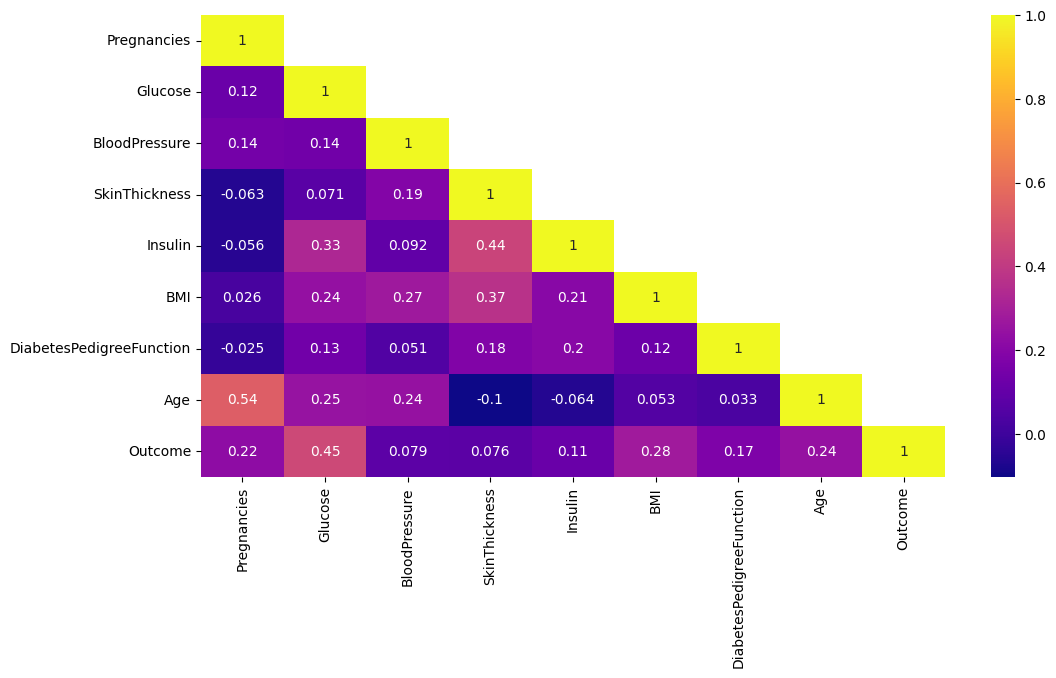

In [ ]:
# TODO: 10 Run this cell to display correlation matrix heat map
# Would you consider dropping any feature based on their correlation?
# Type your answers here:Based on the provided correlation heatmap, it appears that no immediate feature should be dropped due to high correlation, as there are no strong correlations (close to 1 or -1) between any features. However, further analysis and domain knowledge should be considered to make a final decision.
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='plasma',fmt='.2g',annot=True,mask=np.triu(df.corr(),+1))
plt.show()

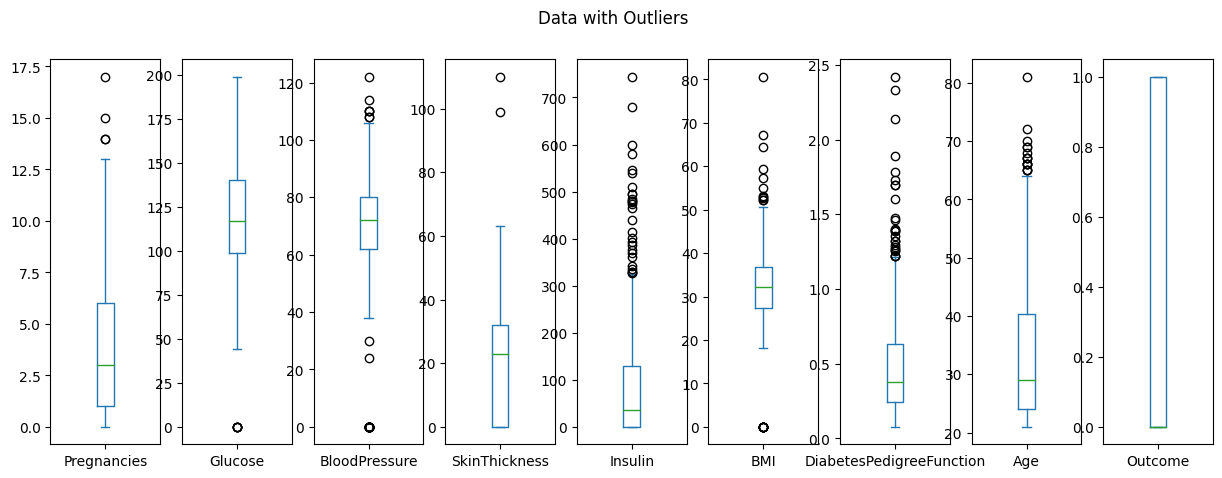

In [ ]:
# TODO: 11 Run this cell to see box plots.
# Visually examine the box plot and answer this question
# How do you identify the 1.5 IQR boundary?
# Which two features have most outliers beyond 1.5 IQR?
# (Increase the figure size if you want to see larger image)
# Put your answer for both questions here
# Answer::-- The 1.5 IQR boundary is identified as a range that extends 1.5 times the Interquartile Range (IQR) below the 25th percentile (Q1) and above the 75th percentile (Q3) in a box plot to identify potential outliers.
# ______pregnancy and Diabetes pedigree function_________________________________

df.plot(kind="box",subplots=True,figsize=(15,5),title="Data with Outliers");

In [ ]:
# TODO: 12 Did you see any nulls in the dataset?
# Ans: _____YES___________________________________

In [ ]:
# But look at how many features have zeros in them
# Display zeroes in each column as percentage
for col in df.columns:
    count = (df[col] == 0).sum()
    percentage = (count * 100)/df.shape[0]
    print(f'Count of zeros in Column {col} : {count}, percentage 0s: {percentage:.2f}%')

Count of zeros in Column Pregnancies : 112, percentage 0s: 15.05%
Count of zeros in Column Glucose : 5, percentage 0s: 0.67%
Count of zeros in Column BloodPressure : 34, percentage 0s: 4.57%
Count of zeros in Column SkinThickness : 215, percentage 0s: 28.90%
Count of zeros in Column Insulin : 359, percentage 0s: 48.25%
Count of zeros in Column BMI : 10, percentage 0s: 1.34%
Count of zeros in Column DiabetesPedigreeFunction : 0, percentage 0s: 0.00%
Count of zeros in Column Age : 0, percentage 0s: 0.00%
Count of zeros in Column Outcome : 491, percentage 0s: 65.99%


1. After executing the above cell, you found many cells contain 0.
2. Some cells should never contain 0. For e.g. Glucose
3. Identify the cells that should never contain 0 and replace those 0 with Nan

In [ ]:
# TODO: 13 Replace 0 with Nan for features that should never contain 0
# Choose 5 columns you want to replace 0 with Nan
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = \
    df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [ ]:
# TODO: 14  Now do null check again to ensure the right featues have Nans. Otherwise go back and fix

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                34
SkinThickness               215
Insulin                     359
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
y = df.pop("Outcome") #Setup target variable
type(y)

pandas.core.series.Series

In [ ]:
# TODO: 15

# Answer these questions with short one liner right in this cell as a comment
#
# 1. What does the pop operation do?
#The `pop` operation removes and returns the specified column from a pandas DataFrame.
#
# 2. Is pop() idempotent or non-idempotent operation?
#The pop() operation is non-idempotent because it modifies the DataFrame by removing the specified column.
#
# 3. How do you check if an operation is idempotent/non-idempotent?
# we can check if an operation is idempotent by assessing whether applying it multiple times has the same effect as applying it once.
#

In [ ]:
X = df # Setup independent variables

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [ ]:
# TODO: 16 Answer these questions
# 1. Did you use stratify?
# Answer : Yes
#
# 2. If yes, on which column and why? If not, why not?
#By including stratify=y, we can ensure that the class distribution in the y (target variable) is preserved when splitting the data into training and testing sets
#

In [ ]:
# TODO: 17 Display all records that have at least one Nan column value
# If you cannot get this, you can leave this cell execution and proceed
# Subsequent cells do not depend on this. If you cannot solve this, you can proceed to next cell
nan_rows = X_train[X_train.isna().any(axis=1)]

X_train[nan_rows, :]

InvalidIndexError: ignored

##### Deciding on Imputation
1. Now you should decide which imputation to use - whether SimpleImputer or IterativeImputer
2. Instead of following MCAR/MAR path to decide on SimpleImputer or IterativeImputer, you will take a simple alternative
3. Use IterativeImputer if a large number of rows have Nan for a column
4. Use SimpleImputer if the number of Nans is very small

In [ ]:
print(f"X_train.shape={X_train.shape}")
X_train.isna().sum()

X_train.shape=(558, 8)


Pregnancies                   0
Glucose                       2
BloodPressure                26
SkinThickness               159
Insulin                     267
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [ ]:
# TODO 18 Based on the results of previous cell which columns will you apply SimpleImputer ?
# Select only those columns here

X_train_mean_impute = X_train.loc[:,['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
X_train_mean_impute

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
616,117.0,96.0,28.7,0.157,30
318,115.0,66.0,38.1,0.150,28
25,130.0,60.0,28.6,0.692,21
328,102.0,86.0,45.5,0.127,23
760,88.0,58.0,28.4,0.766,22
...,...,...,...,...,...
462,74.0,70.0,35.3,0.705,39
390,100.0,66.0,32.0,0.444,42
307,137.0,68.0,24.8,0.143,21
636,104.0,74.0,28.8,0.153,48


In [ ]:
# TODO: 19 Apply SimpleImputer to appropriate columns only
from sklearn.impute import SimpleImputer
columns_to_impute_simple = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']
mean_imputer = SimpleImputer(strategy='mean')
#Fill code above to create SimpleImputer

X_train_mean_imputed = mean_imputer.fit_transform(X_train[columns_to_impute_simple])

# Display first few
X_train_mean_imputed[0:5,:]

array([[1.17e+02, 9.60e+01, 2.87e+01, 1.57e-01, 3.00e+01],
       [1.15e+02, 6.60e+01, 3.81e+01, 1.50e-01, 2.80e+01],
       [1.30e+02, 6.00e+01, 2.86e+01, 6.92e-01, 2.10e+01],
       [1.02e+02, 8.60e+01, 4.55e+01, 1.27e-01, 2.30e+01],
       [8.80e+01, 5.80e+01, 2.84e+01, 7.66e-01, 2.20e+01]])

In [ ]:
# TODO: 20 Which columns will you apply IterativeImputer ?
# Name those columns and provide 2 line short reason
# ____SkinThickness and Insulin : These columns have a substantial number of NaN values, which suggests that IterativeImputer might be a suitable choice for imputing missing values in these columns._____________________

X_train.loc[:,['SkinThickness','Insulin']]

,SkinThickness,Insulin
616,NaN,NaN
318,39.0,140.0
25,23.0,170.0
328,36.0,120.0
760,26.0,16.0
...,...,...
462,40.0,49.0
390,29.0,196.0
307,14.0,148.0
636,NaN,NaN


Iterative Imputer uses all non null features of the dataset to impute. To apply Iteratative Imputer on the two columns identified above, you should have all other features combined into the dataframe or numpy nmatrix first.

You should do the following for that
1. Remove the columns of the dataframe that were subjected to mean imputation
2. Convert the remaining dataframe into numpy matrix
3. Combine the above numpy matrix with mean imputed columns earlier. The "combining" two matrices is achieved by concatenating those two numpy matrices - by using an appropriate numpy stacking function
4. The stacked numpy matrix is then used for iterative imputation

In [ ]:
# TODO: 21 Remove the columns of X_train dataframe that were already subjected to mean imputation
# Hold on to the rest as a Numpy matrix
X_train_set_aside = X_train.drop(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], axis=1).to_numpy()
X_train_set_aside

array([[  6.,  nan,  nan],
       [  3.,  39., 140.],
       [  1.,  23., 170.],
       ...,
       [  0.,  14., 148.],
       [  5.,  nan,  nan],
       [  5.,  23., 112.]])

In [ ]:
# TODO: 22 Concatenate the two numpy matrices by using an appropriate numpy stacking function
# Identify which are those two numpy matrices first and use them

X_train = np.hstack(('X_train_set_aside','X_train_iterative_impute')) # this numpy matrix will be the new X_train from prediction
X_train

array(['X_train_set_aside', 'X_train_iterative_impute'], dtype='<U24')

In [ ]:
# TODO: 23 Perform Iterative Imputation on two columns with Nan data
# At this point only two columns will have Nan - SkinThickness and Insulin
# Those 2 will be imputed using all other columns
# But to make life easy, this is equivalent to performing Iterative Imputation using all other columns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Add IterativeImputer here and fit and transform appropriate columns
# Create an IterativeImputer
iterative_imputer = IterativeImputer(random_state=0)

# Fit and transform the imputer on X_train_set_aside
X_train_iter_imputed = iterative_imputer.fit_transform(X_train_set_aside)

X_train_iter_imputed# this variable should hold your imputer values

array([[  6.        ,  29.37594658, 154.06139065],
       [  3.        ,  39.        , 140.        ],
       [  1.        ,  23.        , 170.        ],
       ...,
       [  0.        ,  14.        , 148.        ],
       [  5.        ,  29.35544024, 152.94646572],
       [  5.        ,  23.        , 112.        ]])

In [ ]:
# TODO: 24 Fill the question marks to do z transform

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_iter_imputed)
X_train_scaled

array([[ 0.70832354,  0.00485711,  0.03237873],
       [-0.20942693,  0.98936521, -0.14398698],
       [-0.82126057, -0.64738066,  0.23228954],
       ...,
       [-1.1271774 , -1.56805021, -0.04364657],
       [ 0.40240672,  0.00275938,  0.01839473],
       [ 0.40240672, -0.64738066, -0.49517839]])

In [ ]:
# TODO: 25 Train the KNN model in this cell

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# TODO: 26  Perform all necessary transformation on X_test in this cell to prepare it for predict()
# look at all the transformation logic that was performed on X_train and repeat it for X_test here
# Put your code here. No template is provided for this section
# Assuming X_test is your test data

# Drop the columns that were subjected to mean imputation
X_test_set_aside = X_test.drop(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], axis=1)

# Remove rows with NaN values
X_test_set_aside = X_test_set_aside.dropna()

# Perform z-score normalization on X_test using the same scaler that was used on X_train
X_test_scaled = scaler.transform(X_test_set_aside)

# Now X_test_scaled is ready for predictions



In [ ]:
from sklearn.metrics import accuracy_score

# Do prediction using the KNN model
y_pred = model.predict(X_test_scaled)

# Calculate and display the accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
accuracy

ValueError: ignored

# Part 2: Data processing and prediction using a pipeline

In [ ]:
# TODO: 28 Repeat activities that need to be done outside pipeline
# Reading csv, dropping duplicates & other steps that you might have performed - but need to be done outside the pipeline now

df = pd.read_csv('d2.csv')

# Check for and drop duplicate rows
df.drop_duplicates(inplace=True)

# Now you can proceed with building and fitting your machine learning pipeline.
#Add other code for dropping duplicates etc

In [ ]:
# TODO: 29 Split the data into X and y. Then do train test split here

y = df.pop("Outcome")
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Design a pipeline that looks like following:

![Pipeline](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211956&authkey=%21AAa4xv7U8X35D44&width=550)

1. SimpleImputer performs mean imputation only on the relevant columns
2. IdentityTransformer (whose code is given below) is a custom sklearn transformer that performs no operation on the input data. Input data is passed through as is
3. The two are wrapped within a ColumnTransformer
4. This is followed by sequential execution of IterativeImputer, StandaScaler and the KNN based clasifier

In [ ]:
# This is a No-op transformer. Use this as is
from sklearn.base import BaseEstimator, TransformerMixin

class IdentityTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X*1

Look at the columns of the dataframe and decide which ones need to go to SimpleImputer and which ones should go to IdentityTransformer

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
# TODO: 30 Select the columns for mean imputation
# Do not type the names directly. Use indices
mean_impute_cols = df.columns[[0, 1, 2]].to_list()
mean_impute_cols

['Pregnancies', 'Glucose', 'BloodPressure']

In [ ]:
mean_impute_col_mask = df.columns.isin(mean_impute_cols)
mean_impute_col_mask

array([ True,  True,  True, False, False, False, False, False])

In [ ]:
# TODO: 31 Use the mean_impute_col_mask to select remaining columns from df.columns to be used with IdentityTransformer
other_cols = df.columns[mean_impute_col_mask == False].to_list()
other_cols

['SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_iterative_imputer

# Create a column transformer with mean imputation and identity transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('mean_impute', SimpleImputer(strategy='mean'), mean_impute_cols),
        ('identity', 'passthrough', other_cols)
    ])

# Finalize the pipeline with iterative imputation, standard scaler, and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('iterative_imputer', IterativeImputer(random_state=0)),
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])


In [ ]:
# TODO: 33 Run this cell to verify if indeed your pipeline looks like what was expected

from sklearn import set_config
set_config(display='diagram')
pipeline  # Put your pipeline variable name here to display pipeline as diagram

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('mean_impute',
                                                  SimpleImputer(),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure']),
                                                 ('identity', 'passthrough',
                                                  ['SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('iterative_imputer', IterativeImputer(random_state=0)),
                ('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

In [ ]:
# TODO: 34 Train pipeline with data
# Import the necessary libraries
from sklearn.pipeline import Pipeline

# Fit the pipeline on your training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('mean_impute',
                                                  SimpleImputer(),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure']),
                                                 ('identity', 'passthrough',
                                                  ['SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('iterative_imputer', IterativeImputer(random_state=0)),
                ('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

In [ ]:
# TODO: 35 Do predictions with pipeline and calculate the accuracy score
# Import the necessary libraries
from sklearn.metrics import accuracy_score

# Use the fitted pipeline to make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy: {accuracy}")


Accuracy: 0.7903225806451613


# Part 3: Combine pipeline & gridsearch for hyperparam tuning

In [ ]:
# TODO: 36. Use GridSearchCV with KFold = 3 for CV and train a model using the pipeline developed earlier
from sklearn.model_selection import GridSearchCV, KFold
# Create KFold here
kf = KFold(n_splits=3, shuffle=True, random_state=0)
# Define hyperparameters
grid_params = {'classifier__n_neighbors': [2,3,4,5,6],
                'classifier__weights': ['uniform','distance'],
                'classifier__metric': ['euclidean', 'manhattan']}

#Create Grid SearchCV object here using KFold object and gridparams
grid = GridSearchCV(estimator=pipeline, param_grid=grid_params, cv=kf, scoring='accuracy', n_jobs=-1)

#Do hyperparameter tuning here with GridSearchCV object
fitted_model =grid.fit(X_train, y_train)

In [ ]:
# TODO: 37 Display the results for best score, best estimator and best params selected by Cross validation
# fitted_model is the result of hyperpaarameter tuning in the previous cell
print(fitted_model.best_score_)
print(fitted_model.best_estimator_)
print(fitted_model.best_params_)

0.7275985663082437
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('mean_impute',
                                                  SimpleImputer(),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure']),
                                                 ('identity', 'passthrough',
                                                  ['SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('iterative_imputer', IterativeImputer(random_state=0)),
                ('scaler', StandardScaler()),
                ('classifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=6,
                                      weights='distance'))])
{'classifier__metric': 'manha

In [ ]:
# TODO: 38 Do predictions with gridsearch and calculate the accuracy score
# Use the best model for predictions
y_pred = fitted_model.best_estimator_.predict(X_test)

from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.7526881720430108


##### Confusion matrix calculation

The next 3 cells are meant for providing hints to calculating the confusion matrix

In [ ]:
# TODO: 39 Put your pipeline name in place of question mark
<pipeline_var_name>.named_steps

In [ ]:
# TODO: 40 Put your pipeline name in place of first question mark
# and appropriate value for second question mark to display the model
<pipeline_var_name>.named_steps[put name of your knn model in the pipeline here]

In [ ]:
# TODO: 41 Put your pipeline name in place of first question mark
# and appropriate value for second question mark to display the model
vars(<pipeline_var_name>.named_steps[put name of your knn model in the pipeline here])

In [ ]:
# TODO: 42 Write code to display a confusion matrix by filling the question marks


cm = confusion_matrix(y_test, y_pred, labels=?)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=?)
disp.plot()
plt.show()

In [ ]:
# TODO: 43 Interpret the confusion matrix in your own words
#


# Part 4: Save the model as json file, load & use it to do prediction

This is optional and will be used to accumulate bonus points as a buffer for the semester lab exam if there is any shortfall